In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and process columns

In [129]:
registrations = pd.read_csv('registrations.csv')

registrations.rename(
    columns={
        'First Name': 'first_name',
        'Last Name': 'last_name',
        'Attendee Status': 'attendee_status',
        'Order Date': 'order_date',
        'Email': 'email',
        'Which competition categories are you most interested in?': 'categories',
        "Which college do you attend?": "college",
        "Specify other college": "other_college",
        "What is your college major?": "major",
        "Specify other major": "other_major",
    }, inplace=True)


df = registrations[['first_name', 'attendee_status',
                    'last_name', 'order_date', 'email', 'categories', 'college', 'major', 'other_college', 'other_major']]

df_attended = df[df['attendee_status'] == 'Checked In']


In [130]:
df_attended.head()


,first_name,attendee_status,last_name,order_date,email,categories,college,major,other_college,other_major
125,Troy,Checked In,DeSpain,2023-01-12 21:25:08-07:00,despaintroy@gmail.com,Data Analytics & Data Visualization,USU - Utah State University,Computer Science,NaN,NaN
126,Michelle,Checked In,Huang,2023-01-20 20:09:33-07:00,michelle80098@gmail.com,NaN,BYUI - Brigham Young University (Idaho),Computer Science,NaN,NaN
130,Keaton,Checked In,Flake,2023-03-01 20:14:21-07:00,fla22009@BYUI.edu,Game Development | AI & Machine Learning,BYUI - Brigham Young University (Idaho),Computer Engineering,NaN,NaN
131,Gilber,Checked In,Chen,2023-03-17 12:15:41-06:00,che20025@byui.edu,NaN,BYUI - Brigham Young University (Idaho),Other,NaN,Software engineering
132,Michael,Checked In,Menjivar,2023-03-01 18:32:15-07:00,mikemen428@byui.edu,Game Development | AI & Machine Learning,BYUI - Brigham Young University (Idaho),Other,NaN,Software Engineering


## Charts

### Registrations

/var/folders/3l/qyt9vb7n3ygdgkx68xxtswcc0000gn/T/ipykernel_34918/2373581701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date_parsed'] = df['order_date'].str.split(' ').str[0]
/var/folders/3l/qyt9vb7n3ygdgkx68xxtswcc0000gn/T/ipykernel_34918/2373581701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date_parsed'] = pd.to_datetime(


<Axes: title={'center': 'Registrations by Date'}>

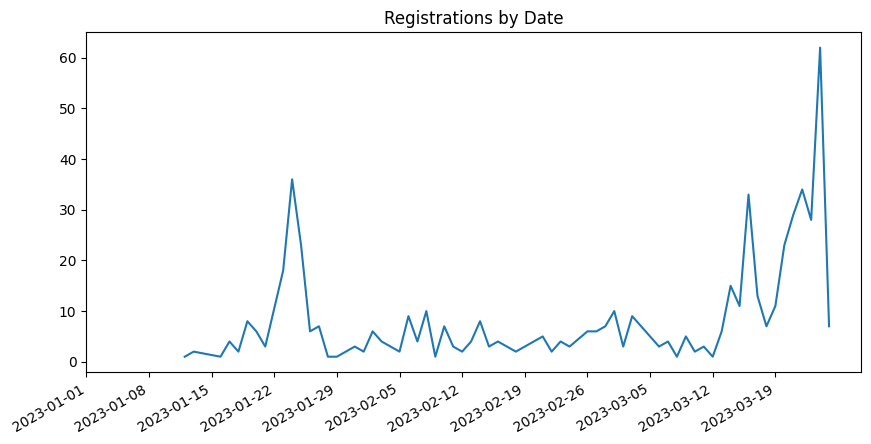

In [131]:
# Registrations per day, format x axis labels as MMM DD, labels on x axis every 7 days
df['order_date_parsed'] = df['order_date'].str.split(' ').str[0]
df['order_date_parsed'] = pd.to_datetime(
    df['order_date_parsed'])

df['order_date_parsed'].value_counts().sort_index().plot(
    kind='line',
    figsize=(10, 5),
    title='Registrations by Date',
    xticks=pd.date_range(start='2023-01-01', end='2023-03-25', freq='7D')
)


<Axes: title={'center': 'Cumulative Registrations'}>

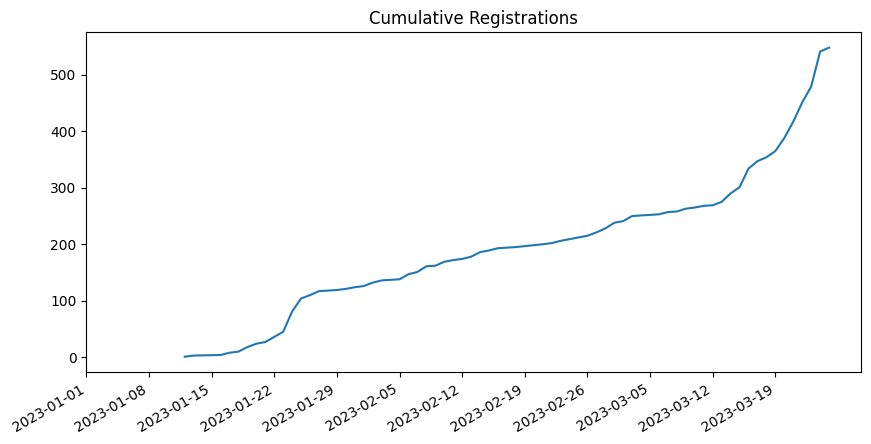

In [132]:
df['order_date_parsed'].value_counts().sort_index().cumsum().plot(
    kind='line',
    figsize=(10, 5),
    title='Cumulative Registrations',
    xticks=pd.date_range(start='2023-01-01', end='2023-03-25', freq='7D')
)


### Categories

Data Analytics    197
Game Dev          128
Hardware           40
AI & ML            31
Name: categories, dtype: int64


<Axes: title={'center': 'Competition Category Interest'}>

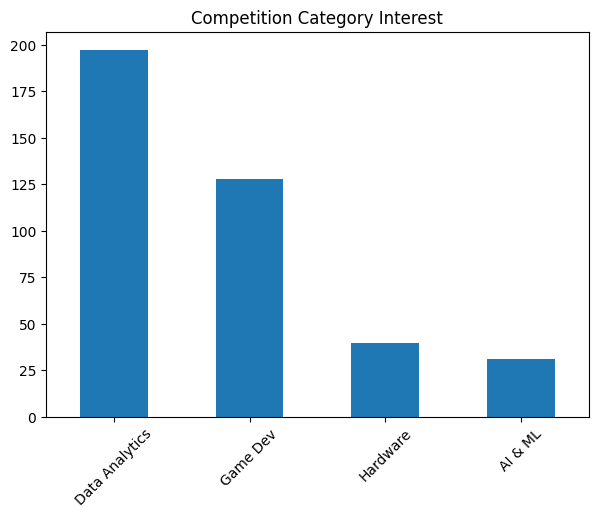

In [133]:
# Split categories only on pipe (not spaces), trim spaces off ends
categories = df['categories'].str.split(
    '|').str[0].str.strip().value_counts()

# rename categories
categories.rename(
    index={
        'Data Analytics & Data Visualization': 'Data Analytics',
        'Game Development': 'Game Dev',
        'AI & Machine Learning': 'AI & ML',
    }, inplace=True)


# Print counts and bar plot
print(categories)
categories.plot(
    kind='bar',
    rot=45,
    figsize=(7, 5),
    title='Competition Category Interest'
)


### Schools

USU                                       320
BYUI                                       36
UofU                                       21
UVU                                         5
WSU                                         5
BYU                                         5
SUU                                         3
Bridgerland Technical College               2
Western Governors University                2
Boise State University                      1
Salt Lake Community College                 1
Tech Elevator                               1
Ogden-Weber Applied Technology College      1
Lightningkite                               1
Name: merged_college, dtype: int64


/var/folders/3l/qyt9vb7n3ygdgkx68xxtswcc0000gn/T/ipykernel_34918/2059774833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attended.loc[df_attended['college'] == 'Other', 'merged_college'] = df_attended['other_college']
/var/folders/3l/qyt9vb7n3ygdgkx68xxtswcc0000gn/T/ipykernel_34918/2059774833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attended['merged_college'] = df_attended['merged_college'].str.split(' - ').str[0]


<Axes: title={'center': 'Attendance by College'}>

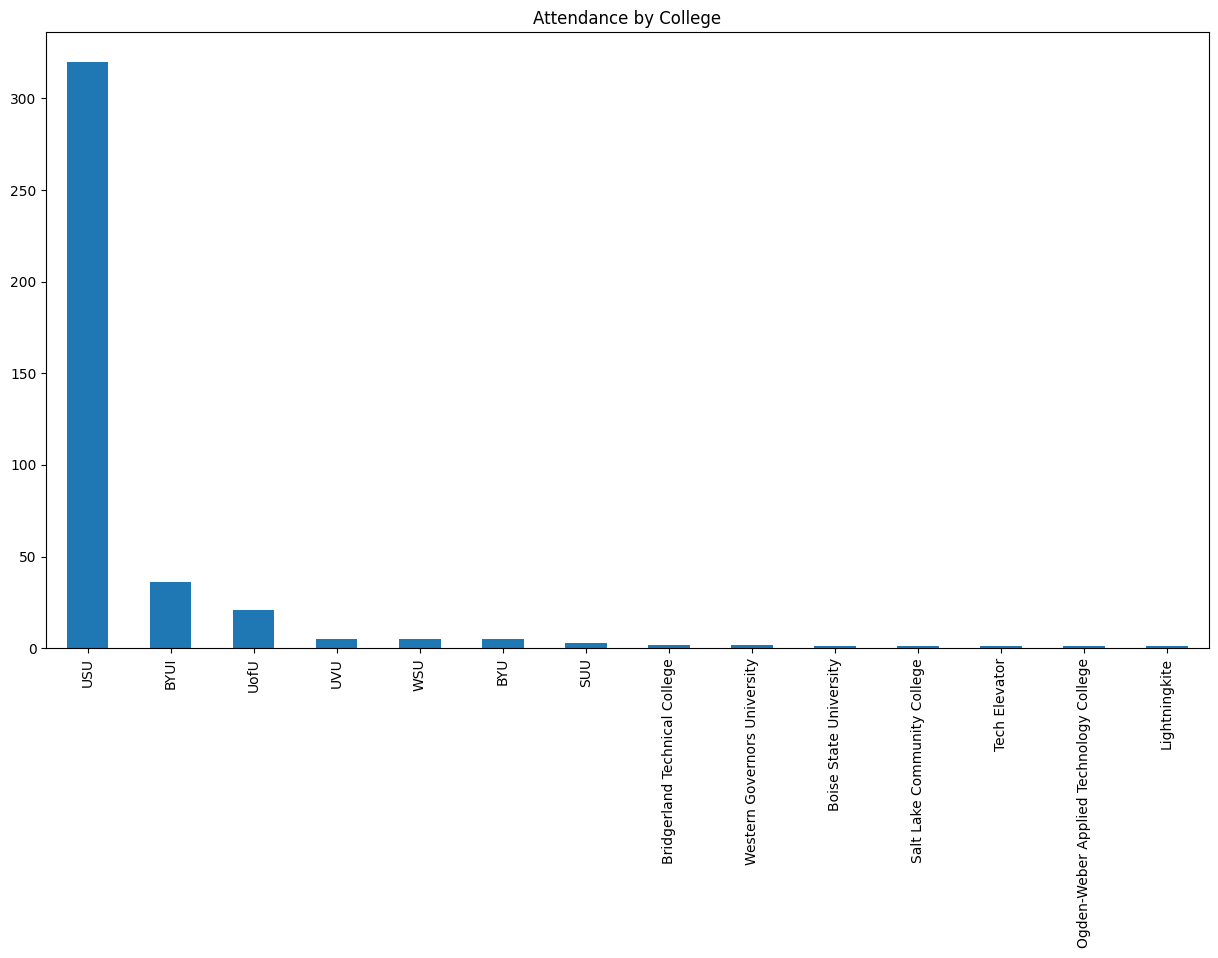

In [134]:
# Merge college and other_college columns. Use other_college if college is 'Other'

df_attended.loc[df_attended['college'] == 'Other', 'merged_college'] = df_attended['other_college']
df_attended.loc[df_attended['college'] != 'Other', 'merged_college'] = df_attended['college']


df_attended['merged_college'] = df_attended['merged_college'].str.split(' - ').str[0]


same_names = [
    ['BYUI', 'Brigham Young University Idaho'],
    ['SUU', 'Southern Utah University'],
]

# Merge colleges with same names into one
for names in same_names:
    df_attended.loc[df_attended['merged_college'] == names[1], 'merged_college'] = names[0]

# List counts
print(df_attended['merged_college'].value_counts())

df_attended['merged_college'].value_counts().plot(
    kind='bar',
    figsize=(15, 8),
    title='Attendance by College'
)


### Majors

computer science / software           207
mechanical / aerospace engineering     48
computer / electrical engineering      41
information systems                    22
data analytics                         20
business / economics / management      15
math / stats / data science            13
undecided / general studies            12
education                              10
other technology                        9
other                                   7
biology / chemistry                     6
other science                           6
art / design                            5
marketing                               5
kinesiology                             3
other engineering                       3
aerospace / aviation                    3
english / writing                       2
aviation management                     2
music                                   2
data science                            0
dtype: int64


/var/folders/3l/qyt9vb7n3ygdgkx68xxtswcc0000gn/T/ipykernel_34918/1848265817.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  major = major.append(pd.Series(df_attended['other_major'].str.split(


<Axes: title={'center': 'Attendance by Major'}>

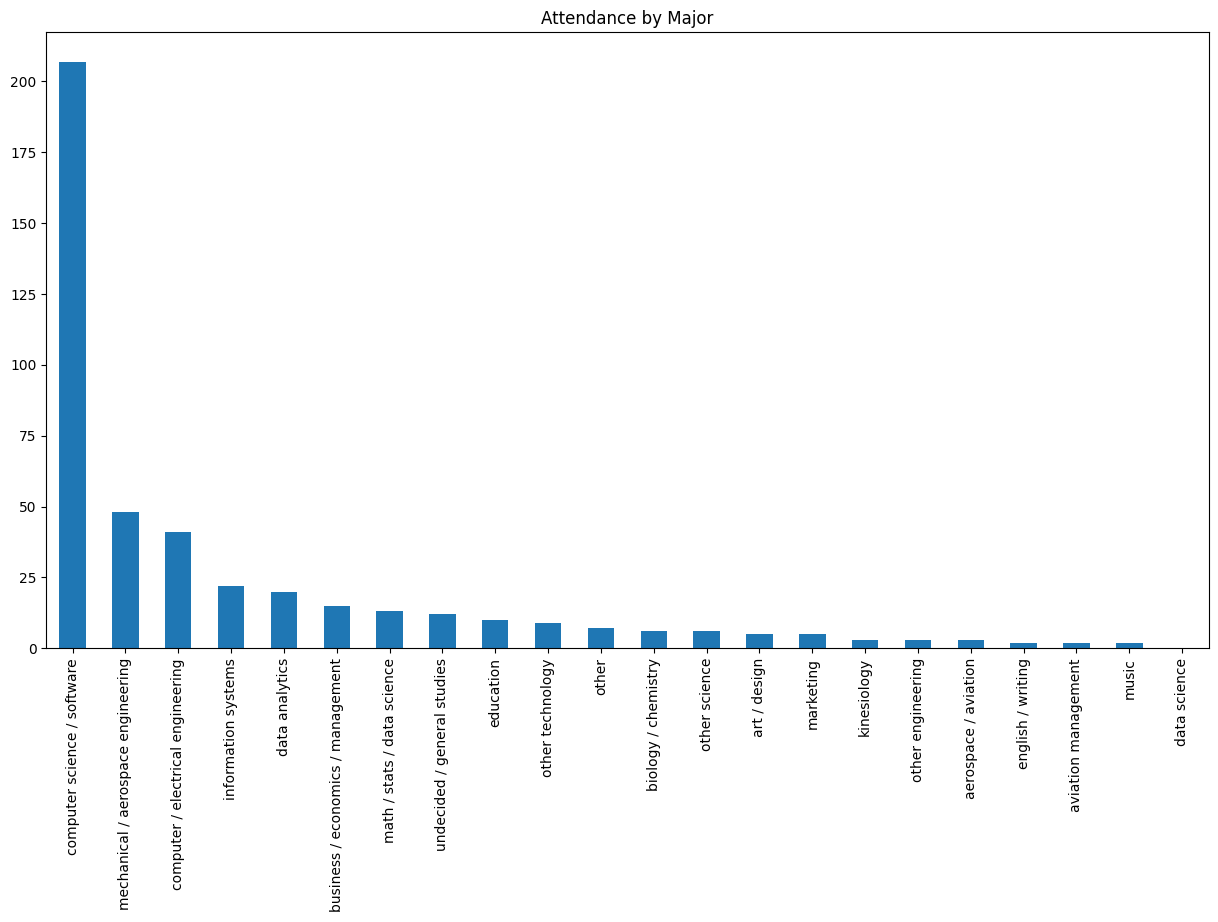

In [135]:
major = df_attended['major'].str.split(
    '|').str[0].str.strip().value_counts()

major.drop('Other', inplace=True)
major = major.append(pd.Series(df_attended['other_major'].str.split(
    '|').str[0].str.strip().value_counts()))

major.index = major.index.str.lower()

same_names = [
    ['computer science / software', 'computer science',
        'human experience design and interaction, with a minor in cs.', 'software engineering', 'javascript fullstack web design', 'software engineer'],
    ['data science', 'data sciencec'],
    ['mechanical engineering', 'mechanical engineer', 'mae'],
    ['music', 'music education', 'music performance'],
    ['education', 'instructor', 'secondary education', 'eled', 'elementary education',
        'cte edd and special edd', 'instructional technology and learning sciences', 'curriculum and instruction', 'instructional technology', 'social studies composite teaching'],
    ['biology / chemistry', 'biology', 'chemistry', 'biochemistry'],
    ['art / design', 'art (cs minor)', 'art-ceramics', 'graphic design', 'outdoor product design',
     'architecture', 'web design and development', 'ornamental horticulture', 'human experience design and interaction (hedi)', 'opdd'],
    ['mechanical / aerospace engineering',
        'mechanical and aerospace engineering', 'mechanical engineering'],
    ['computer / electrical engineering',
        'computer engineering', 'electrical engineering'],
    ['undecided / general studies', 'interdisciplinary major', 'exploratory'],
    ['other engineering', 'chemical engineering',
        'civil engineering', 'engineering', 'engineering education'],
    ['other science', 'plant science', 'exercise science',
        'animal, dairy and veterinary science', 'conservation and restoration ecology', 'physics', 'ecology', 'iad'],
    ['math / stats / data science', 'mathematics', 'statistics', 'data science'],
    ['aerospace / aviation', 'unmanned aerial systems', 'aerospace/aviation sciences'],
    ['business / economics / management', 'business', 'multimedia design & business',
        'management', 'operations', 'business management', 'economics', 'finance & economics', 'accounting', 'finance'],
    ['other technology', 'technology systems', 'technology systems: cybersecurity',
        'computer information technology', 'cycersecurity and network management'],
    ['english / writing', 'english - technical communication',
        'journalism(broadcasting)', 'english'],
    ['other', 'political science and philosophy', 'psychology', 'political science and philosophy', 'speech language pathology', 'political science', 'social work', 'history', 'null']
]

# Remove names that aren't in the index
for names in same_names:
    for name in names[1:]:
        if name not in major.index:
            names.remove(name)

for names in same_names:
    if names[0] not in major.index:
        major.loc[names[0]] = 0

    major.loc[names[0]] = major.loc[names].sum()

    major.drop(names[1:], inplace=True)

# merge with same key
major = major.groupby(major.index).sum()

# sort by count
major.sort_values(ascending=False, inplace=True)

print(major)

major.plot(
    kind='bar',
    figsize=(15, 8),
    title='Attendance by Major'
)


<Axes: title={'center': 'Attendance by Major (Excluding Computer Science / Software)'}>

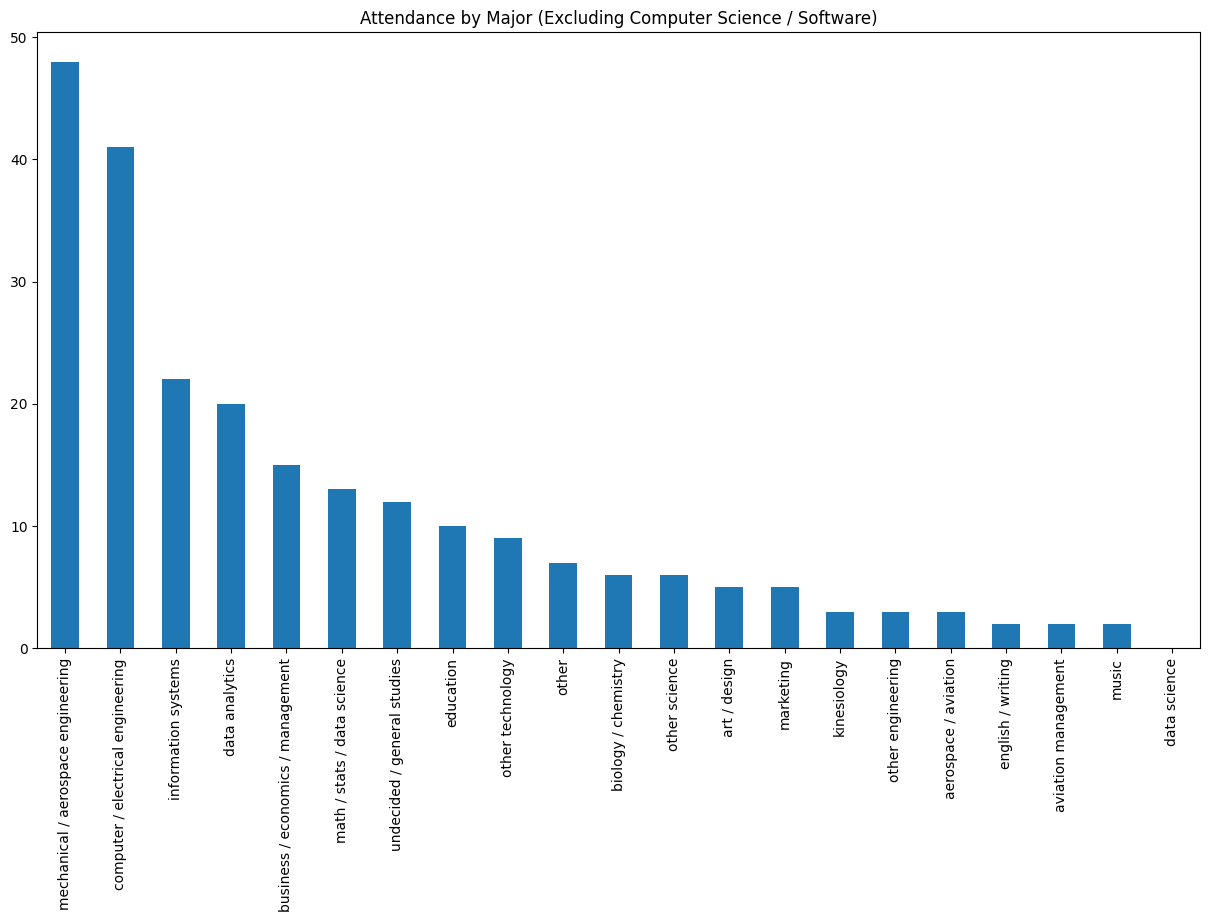

In [136]:
# Major excluding computer science /software
major_no_cs = major.drop(['computer science / software'])

major_no_cs.plot(
    kind='bar',
    figsize=(15, 8),
    title='Attendance by Major (Excluding Computer Science / Software)'
)
